# <center> Module 2B Homework

<center>  ISE-529 Predictive Analytics
<center> Assignment

*Note:  In answering the following questions, you may only use functionality from Base Python, NumPy, Pandas, or Seaborn*

#### 1.  Evaluating regression functions

1A)  The file "HW 2 Problem 1 Data.xlsx" contains two datasets - training and test in two different spreadsheet tabs.  Read the tables into two dataframes (training_data and test_data) and display the first 10 rows of each dataframe.  Hint - look up the Pandas function for reading in Excel files.

In [1]:
import pandas as pd
training_data = pd.read_csv(r'C:\Users\Jerry\OneDrive - University of Southern California\Desktop\ISE_529\HW2\Problem 1 Training Dataset.csv')
test_data = pd.read_csv(r'C:\Users\Jerry\OneDrive - University of Southern California\Desktop\ISE_529\HW2\Problem 1 Test Dataset.csv')
training_data.head(10)

,X,Y
0,22.461229,1777.640170
1,84.889232,4119.062075
2,87.522032,3949.307419
3,14.696069,1598.543037
4,3.402483,293.380868
5,30.418684,1536.785742
6,41.611263,1847.445321
7,13.689247,789.595510
8,92.638951,4638.075124
9,74.219724,2850.494496


In [2]:
test_data.head(10)

,X,Y
0,41.535269,1193.508446
1,86.563634,4115.877672
2,20.192209,1601.366850
3,47.974340,2572.686060
4,83.449552,4110.238516
5,90.662401,3463.665650
6,13.262197,1540.725682
7,42.822816,3299.177263
8,92.369626,3345.980165
9,65.219225,4403.195082


1b)  Using Seaborn, create scatterplots of the two dataframes.  For full credit, include a title ("Training Data" and "Test Data") for the two scatterplots.

Text(0.5, 1.0, 'Training Data')

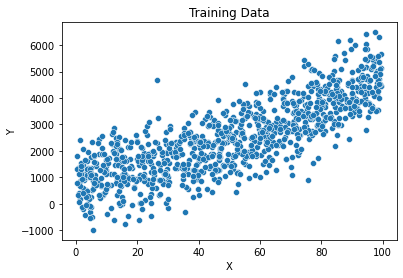

In [3]:
import seaborn as sns

training_plot = sns.scatterplot(x=training_data['X'], y=training_data['Y'])
training_plot.set_xlabel("X", fontsize = 10)
training_plot.set_ylabel("Y", fontsize = 10)
training_plot.set_title("Training Data")

Text(0.5, 1.0, 'Test Data')

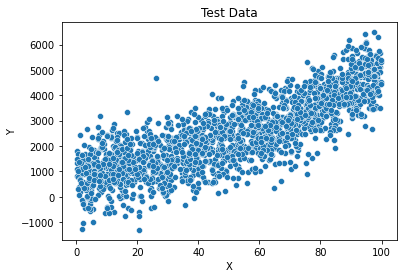

In [4]:
import seaborn as sns

test_plot = sns.scatterplot(x=test_data['X'], y=test_data['Y'])
test_plot.set_xlabel("X", fontsize = 10)
test_plot.set_ylabel("Y", fontsize = 10)
test_plot.set_title("Test Data")

1c)  Now, we are going to calculate the test and training MSEs for three different candidate regression models:
  - F1:  $40x + 500$
  - F2:  $0.25x^2 + 15x + 915$
  - F3:  $0.001x^3 +0.07x^2 + 22xx - 860$

Create three functions for these three candidate models - f1(), f2(), and f3().  They should take as an input $x$ and return the predicted value of $y$ corresponding to that input:

In [5]:
def F1(x):
    y = 40*x+500
    return y
def F2(x):
    y = 0.25*(x*x) + 15*x + 915
    return y
def F3(x):
    y = 0.001*(x**3) + 0.07*(x**2) + 22*x - 860
    return y
F1(training_data['X'])

0      1398.449156
1      3895.569280
2      4000.881296
3      1087.842778
4       636.099306
          ...     
995    1085.947716
996    1035.754885
997    3653.309160
998    1585.950785
999    3811.202938
Name: X, Length: 1000, dtype: float64

In [6]:
F2(training_data['X'])

0      1378.045134
1      3989.883908
2      4142.857025
3      1189.434656
4       968.931462
          ...     
995    1188.376445
996    1160.757034
997    3651.140725
998    1506.495467
999    3869.836241
Name: X, Length: 1000, dtype: float64

In [7]:
F3(training_data['X'])

0      -319.205645
1      2123.723055
2      2272.120203
3      -518.394284
4      -784.295609
          ...     
995    -519.564484
996    -550.374302
997    1799.255790
998    -191.123015
999    2008.093265
Name: X, Length: 1000, dtype: float64

1d)  Now, write a function calc_mse() that takes three parameter inputs:
  - $x$ - an array (or Pandas series) of predictor $X$ values
  - $y$ - an array (or Pandas series) of response $Y$ values
  - $f$ - a function to be called for each value of the $x$ and $y$ arrays
  
The function should calculate the MSE for the function $f$ using the $x$ and $y$ data arrays

In [8]:
def calc_mse(x, y, f):
    tse = 0
    predict_y = f(x)
    se = (y - predict_y)**2
    tse += se
    return sum(tse)/len(y)

1e)  Call this calc_mse function six times to calculate the training and test MSE for each of the three models:

In [9]:
calc_mse(training_data['X'], training_data['Y'], F1)

651579.9579588172

In [10]:
calc_mse(training_data['X'], training_data['Y'], F2)

617950.7022509753

In [11]:
calc_mse(training_data['X'], training_data['Y'], F3)

3746108.2459175778

In [12]:
calc_mse(test_data['X'], test_data['Y'], F1)

641128.8822276224

In [13]:
calc_mse(test_data['X'], test_data['Y'], F2)

601065.5232581273

In [14]:
calc_mse(test_data['X'], test_data['Y'], F3)

3643289.575973654

1f)  Which of the three models would you select for use and why?

I will use F2, because in both training data and test data F2 has the lowest MSE.

1g) Insted of writing functions, write a single line of Python code to calculate the test MSE for function F1.  Hint:  use the Python map and lambda functions.

In [15]:
mse = F1(test_data['X']) - test_data['Y']
sum(list(map(lambda n: n ** 2 / len(mse), mse)))

641128.8822276226

#### 2.  KNN and Calculate Misclassification Rates

2a)  Read the file "Problem 2 Training Dataset.csv" into a dataframe called knn_training_data and the file 'Problem 2 Test Dataset.csv' into a dataframe called knn_test_data.  Display the first 10 rows of the knn_training_data dataframe.

In [16]:
knn_training_data = pd.read_csv(r'C:\Users\Jerry\OneDrive - University of Southern California\Desktop\ISE_529\HW2\Problem 2 Training Dataset.csv')
knn_test_data = pd.read_csv(r'C:\Users\Jerry\OneDrive - University of Southern California\Desktop\ISE_529\HW2\Problem 2 Test Dataset.csv')
knn_training_data.head(10)

,X1,X2,Y
0,68.936765,27.289798,Yellow
1,6.441438,94.429682,Red
2,11.456609,90.660702,Red
3,15.934097,28.927926,Red
4,44.847427,10.069445,Yellow
5,59.249555,62.548411,Blue
6,6.524247,86.135853,Red
7,10.158818,83.543817,Red
8,93.640622,32.986361,Yellow
9,18.484073,56.248987,Red


In [17]:
knn_test_data.head(10)

,X1,X2,Y
0,58.271758,21.169050,Yellow
1,52.610102,58.256975,Blue
2,22.743925,46.292871,Red
3,22.928611,23.782804,Red
4,28.829606,26.873953,Red
5,41.769966,84.340371,Blue
6,78.783755,10.819478,Yellow
7,58.959003,33.807893,Yellow
8,32.103775,83.987495,Red
9,44.027745,79.680364,Blue


2b)  Using Seaborn, create a color-coded scatterplot of the training data (where each point is colored with its category color).  For full credit, be sure to color the points correctly with yellow, blue, and red colors. 

<AxesSubplot:xlabel='X1', ylabel='X2'>

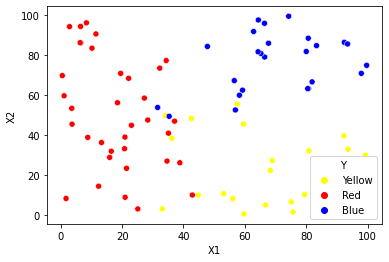

In [18]:
sns.scatterplot(data=knn_training_data, x="X1", y="X2", hue="Y", palette=['yellow','red','blue'])

Now, we are going to create and assess predictions for the category of the test data using KNN-1 and KNN-3 algorithms. 

The problem sub-parts below will step you through the process of doing this.

2c)  Create a two-dimensional numpy array of size 20x80 that has the distance of each training set observation to each test set observation.  Use a Euclidean formula to calculate the distances.  Display the first row of the distance table (this row will show the distance of each training observation from the first observation in the test dataset)

In [19]:
import numpy as np
a = np.array(knn_test_data[['X1', 'X2']])
b = np.array(knn_training_data[['X1', 'X2']])
distance = []
for i in a:
    for j in b:
        distance.append((((i[0] - j[0])**2) + ((i[1] - j[1])**2))**0.5)
dist = np.array(distance).reshape((20,80))
dist[0]

array([12.29658237, 89.74130698, 83.78990275, 43.04274198, 17.41877939,
       41.39091196, 83.05715112, 78.77478316, 37.29082173, 53.04396176,
       70.98435797, 58.52378458, 28.0393509 , 43.19596561, 39.39910164,
       33.4528812 , 75.25960415, 31.50833222, 36.92126057, 38.83946741,
       52.57468049, 63.07598622, 37.54910519, 63.66810929, 25.1636151 ,
       31.39676473, 64.09588742, 46.43146979, 26.22125121, 20.11286953,
       37.74853053, 73.70675387, 42.22043287, 10.11253521, 59.55635032,
       91.78112791, 63.53613445, 39.92979242, 60.14544456, 73.47224603,
       68.98583631, 75.55607563, 39.24193717, 70.85918548, 60.88455637,
       24.45510013, 47.77384456, 67.91756101, 47.48547634, 51.30419819,
       61.07020394, 90.13450125, 68.4198678 , 46.18883752, 57.99700863,
       30.52704445, 24.37353434, 76.72704702, 41.43093592, 47.66129537,
       42.53703099, 22.20746811, 34.49008451, 11.62225603, 20.56583871,
       12.9965694 , 36.43270978, 23.82595957, 65.54942848, 64.48

2d)  Now create a dataframe with 20 rows (one per observation in the test dataset) and 3 columns labeled 'nn1_cat', 'nn2_cat', and 'nn3_cat'.  Populate the dataframe with the category color for the first, second, and third nearest neighbor for each observation.

Display the first ten rows of this dataframe

In [20]:
data = knn_test_data.iloc[:20]
data

,X1,X2,Y
0,58.271758,21.169050,Yellow
1,52.610102,58.256975,Blue
2,22.743925,46.292871,Red
3,22.928611,23.782804,Red
4,28.829606,26.873953,Red
5,41.769966,84.340371,Blue
6,78.783755,10.819478,Yellow
7,58.959003,33.807893,Yellow
8,32.103775,83.987495,Red
9,44.027745,79.680364,Blue


In [21]:
howfar = []
cat = []
nnc = []
ktd = np.array(data)

for i in ktd:
    howfar = []
    for j in ktd:
        howfar.append([((i[0] - j[0]) ** 2 + (i[1] - j[1]) ** 2) ** 0.5, j[2]])
    howfar = sorted(howfar, key=lambda x:x[0])
    cat.append(howfar[1:4])

for i in cat:
    for j in i:
        nnc.append(j[1])
np_nnc = np.array(nnc)
np_nnc = np_nnc.reshape(20,3)
data[['nn1_cat', 'nn2_cat', 'nn3_cat']] = pd.DataFrame(np_nnc, index = data.index, columns = ['nn1_cat', 'nn2_cat', 'nn3_cat'])
data.head(10)

C:\Users\Jerry\AppData\Local\Temp\ipykernel_18452\1700397437.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['nn1_cat', 'nn2_cat', 'nn3_cat']] = pd.DataFrame(np_nnc, index = data.index, columns = ['nn1_cat', 'nn2_cat', 'nn3_cat'])
C:\Users\Jerry\AppData\Local\Temp\ipykernel_18452\1700397437.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['nn1_cat', 'nn2_cat', 'nn3_cat']] = pd.DataFrame(np_nnc, index = data.index, columns = ['nn1_cat', 'nn2_cat', 'nn3_cat'])
C:\Users\Jerry\AppData\Local

,X1,X2,Y,nn1_cat,nn2_cat,nn3_cat
0,58.271758,21.169050,Yellow,Yellow,Yellow,Yellow
1,52.610102,58.256975,Blue,Blue,Blue,Yellow
2,22.743925,46.292871,Red,Red,Red,Red
3,22.928611,23.782804,Red,Red,Red,Red
4,28.829606,26.873953,Red,Red,Red,Red
5,41.769966,84.340371,Blue,Blue,Red,Red
6,78.783755,10.819478,Yellow,Yellow,Yellow,Yellow
7,58.959003,33.807893,Yellow,Yellow,Yellow,Blue
8,32.103775,83.987495,Red,Blue,Blue,Red
9,44.027745,79.680364,Blue,Blue,Red,Blue


2e)  Create a series nn1_preds that has the prediction for each observation using a KNN1 algorithm.  Display the first 10 rows of the prediction series.

In [22]:
X = np.array(knn_training_data[['X1', 'X2', 'Y']])
y = np.array(knn_training_data[['Y']])

X_test = np.array(knn_test_data[['X1', 'X2']])
y_test = np.array(knn_test_data[['Y']])

In [23]:
k = 1
nn1_preds = []
Count = {}
for i in range(len(X_test)):
    d = []
    for j in range(len(X)):
        dist = ((X_test[i][0] - X[j][0]) ** 2 + (X_test[i][1] - X[j][1]) ** 2) ** 0.5
        d.append([dist, X[j][2]])
    d = sorted(d, key=lambda x:x[0])
    d = d[:k]
    for d, j in d:
        Count[j] = Count.get(j, 0) + 1
    sort_Count = sorted(Count.items(), key=lambda x: x[1], reverse=True)
    nn1_preds.append(sort_Count[0][0])
    Count = {}
nn1_preds[:10]

['Yellow',
 'Yellow',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Yellow',
 'Yellow',
 'Red',
 'Blue']

2f)  Calculate the misclassification rate for the KNN1 algorithm on this dataset

In [24]:
error = 0
for p, t in zip(nn1_preds, y_test):
    if p != t:
        error += 1
print(error / len(y_test))

0.1


2g)  Create a Pandas series nn3_preds that has the prediction for each observation using a KNN3 algorithm.  Display the first 10 rows of the series.  (If the three nearest neighbors all have different color categories, use the first nearest neighbor category as the prediction)

In [25]:
k = 3
nn3_preds = []
Count = {}
for i in range(len(X_test)):
    d = []
    for j in range(len(X)):
        dist = ((X_test[i][0] - X[j][0]) ** 2 + (X_test[i][1] - X[j][1]) ** 2) ** 0.5
        d.append([dist, X[j][2]])
    d = sorted(d, key=lambda x:x[0])
    d = d[:k]
    for d, j in d:
        Count[j] = Count.get(j, 0) + 1
    sort_Count = sorted(Count.items(), key=lambda x: x[1], reverse=True)
    nn3_preds.append(sort_Count[0][0])
    Count = {}
nn3_preds[:10]

['Yellow',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Red',
 'Yellow',
 'Yellow',
 'Red',
 'Red']

2h) Calculate the misclassification rate for the KNN3 algorithm on this dataset

In [26]:
error = 0
for p, t in zip(nn3_preds, y_test):
    if p != t:
        error += 1
print(error / len(y_test))

0.1
